In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

In [3]:
# download an hour of THEMIS ASI data
dataset_name = "THEMIS_ASI_RAW"
start_dt = datetime.datetime(2021, 11, 4, 9, 0)
end_dt = datetime.datetime(2021, 11, 4, 9, 59)
site_uid = "atha"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [4]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [5]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=1000, max=10000)

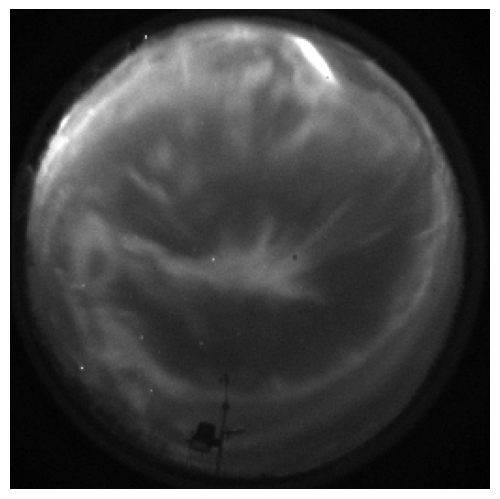

In [6]:
at.display(images_scaled[:, :, 0], cmap="gray")

# Generate a keogram

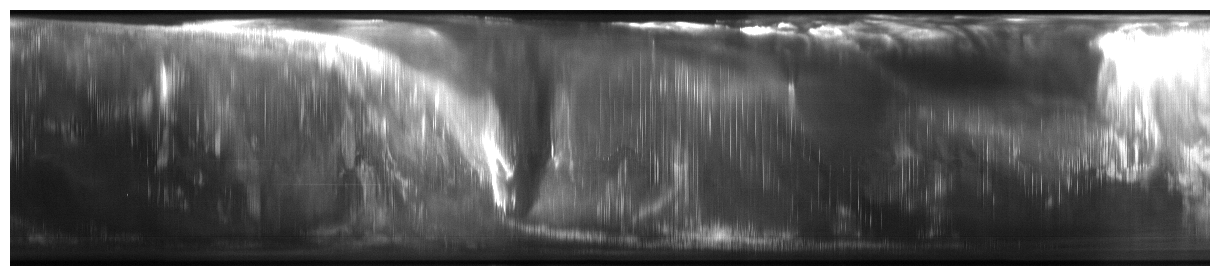

In [7]:
keogram = at.keogram.create(images_scaled, data.timestamp)
at.display(keogram.data, cmap="gray", figsize=(12, 4))

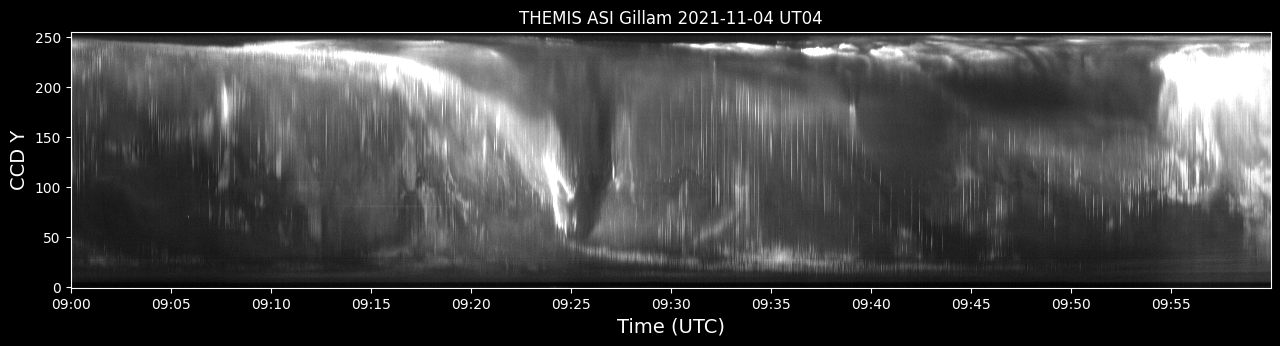

In [8]:
at.set_theme("dark")
plot_dt = start_dt  # this gets changed later, so we'll capture it now
keogram.plot(
    title="THEMIS ASI Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    cmap="gray",
)
# at.set_theme("default")

# Reference in geographic coordinates

In [9]:
# download skymap files
start_dt = datetime.datetime(2020, 1, 1)
end_dt = datetime.datetime(2022, 1, 1)
r = aurorax.data.ucalgary.download("THEMIS_ASI_SKYMAP_IDLSAV", start_dt, end_dt, site_uid="atha", overwrite=True)
r.filenames

['/home/darrenc/pyaurorax_data/THEMIS_ASI_SKYMAP_IDLSAV/atha/atha_20200301/themis_skymap_atha_20200301-+_v02.sav',
 '/home/darrenc/pyaurorax_data/THEMIS_ASI_SKYMAP_IDLSAV/atha/atha_20201109/themis_skymap_atha_20201109-+_v02.sav',
 '/home/darrenc/pyaurorax_data/THEMIS_ASI_SKYMAP_IDLSAV/atha/atha_20210304/themis_skymap_atha_20210304-+_v02.sav',
 '/home/darrenc/pyaurorax_data/THEMIS_ASI_SKYMAP_IDLSAV/atha/atha_20211014/themis_skymap_atha_20211014-+_v02.sav']

In [10]:
# we want to use the last one, which will be the most recent for the date we're working with
skymaps = aurorax.data.ucalgary.read(r.dataset, r.filenames[-1])
skymaps.data[0].pretty_print()

Skymap:
  filename               : /home/darrenc/pyaurorax_data/THEMIS_ASI_SKYMAP_IDLSAV/atha/atha_20211014/themis_skymap_atha_20211014-+_v02.sav
  full_azimuth           : array(dims=(256, 256), dtype=>f4)
  full_elevation         : array(dims=(256, 256), dtype=>f4)
  full_map_altitude      : array(dims=(3,), dtype=>f4)
  full_map_latitude      : array(dims=(3, 257, 257), dtype=>f4)
  full_map_longitude     : array(dims=(3, 257, 257), dtype=>f4)
  generation_info        : SkymapGenerationInfo(...)
  imager_uid             : themis02
  project_uid            : themis
  site_map_altitude      : 0.0
  site_map_latitude      : 54.60263
  site_map_longitude     : 246.35573
  site_uid               : atha
  version                : v02


In [11]:
keogram.set_geographic_latitudes(skymaps.data[0])

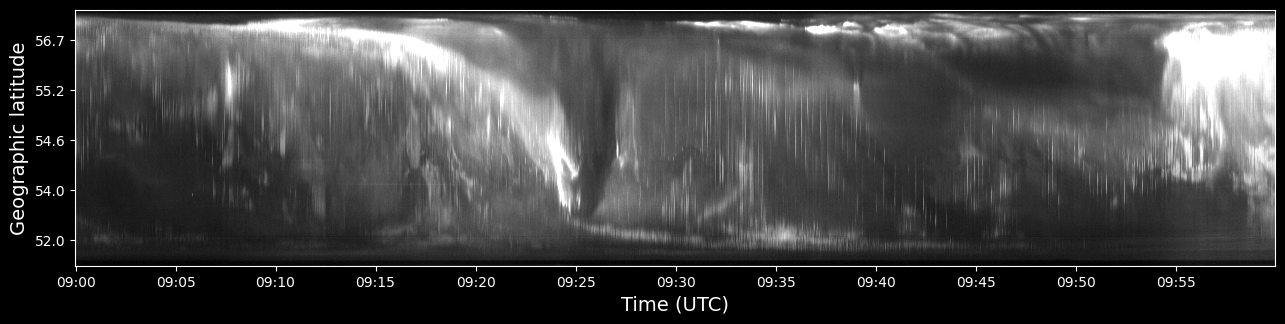

In [12]:
keogram.plot(figsize=(12, 4), cmap="gray", y_type="geo")

In [13]:
keogram.set_magnetic_latitudes(skymaps.data[0], start_dt)

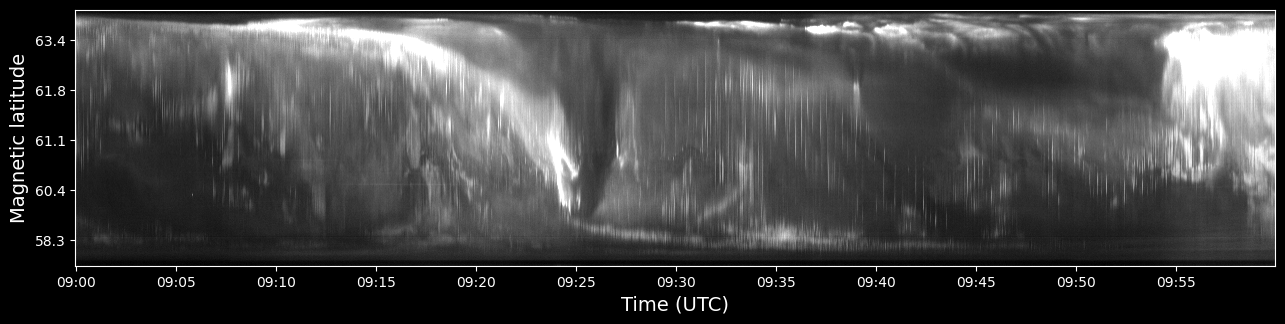

In [14]:
keogram.plot(figsize=(12, 4), cmap="gray", y_type="mag")